In [1]:
import pandas as pd
pd.set_option('display.max_columns',100) # Displaying max columns present in the dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # remove warnings from the notebook

In [2]:
with open('_chat.txt',encoding='UTF-8') as f:
    pieces = [i.strip() for i in f.read().splitlines()]

In [3]:
chat=pd.DataFrame(
    re.findall(r'\[(.*?)\]\s*([^:]+):\s*(.*)', '\n'.join(pieces)),
    columns=['Time', 'Name', 'Text']
)

In [5]:
new_chat=chat.loc[2:]

In [6]:
# Get date
date_regex=re.compile(r'(\d+/\d+/\d+)')
date=lambda x : date_regex.findall(x)

In [7]:
new_chat['date']=new_chat['Time'].apply(date)

In [8]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [9]:
new_chat['date']=new_chat['date'].apply(listToString)

In [10]:
new_chat['date']=pd.to_datetime(new_chat['date'])

In [11]:
new_chat['Word Length']=new_chat['Text'].apply(len)

In [12]:
new_chat['month']=new_chat['date'].dt.month

In [13]:
new_chat['day']=new_chat['date'].dt.day

In [14]:
# Get time
time_regex=re.compile(r'(\d{1,2}\:\d{1,2}\:\d{1,2} \w+)')
time=lambda x :time_regex.findall(x)

In [16]:
new_chat['time_']=new_chat['Time'].apply(time)

In [17]:
new_chat['time_']=new_chat['time_'].apply(listToString)

In [18]:
new_chat['time_'] = pd.to_datetime(new_chat['time_'])

In [19]:
new_chat['hours']=new_chat.time_.apply(lambda x: x.hour)

In [21]:
def distributeByAmPm(linesText):
    # RegExp to extract Time information
    timeRegex = re.compile("(\d+(:)\d+)(\s)(\w+)")
    matches = re.findall(timeRegex, linesText)
    if(len(matches) > 0):
         return matches[0][3]
          
        
new_chat['AM/PM']=new_chat['Time'].apply(distributeByAmPm)



In [22]:
new_chat.head(20)

,Time,Name,Text,date,Word Length,month,day,time_,hours,AM/PM
2,"10/3/19, 12:45:49 AM",Sundar Adf,‎image omitted,2019-10-03,14,10,3,2020-01-29 00:45:49,0,AM
3,"10/3/19, 10:57:09 AM",Shan ADF,Needed: Lowering of personal income tax as pro...,2019-10-03,62,10,3,2020-01-29 10:57:09,10,AM
4,"10/5/19, 7:17:32 AM",‪+91 94860 39410‬,‎image omitted,2019-10-05,14,10,5,2020-01-29 07:17:32,7,AM
5,"10/5/19, 9:53:03 AM",‪+91 94443 47856‬,‎image omitted,2019-10-05,14,10,5,2020-01-29 09:53:03,9,AM
6,"10/8/19, 1:07:17 PM",Bharath ADF,‎This message was deleted.,2019-10-08,26,10,8,2020-01-29 13:07:17,13,PM
7,"10/8/19, 1:07:39 PM",Bharath ADF,Any body cmg from USA need two mobiles: iPhone...,2019-10-08,68,10,8,2020-01-29 13:07:39,13,PM
8,"10/8/19, 1:11:07 PM",Shiva ADF,Get me visa I will go and come..,2019-10-08,32,10,8,2020-01-29 13:11:07,13,PM
9,"10/8/19, 1:11:36 PM",Venky ADF DE Team,😄😄😄,2019-10-08,3,10,8,2020-01-29 13:11:36,13,PM
10,"10/8/19, 1:12:10 PM",Bharath ADF,Poidu Ana varada,2019-10-08,16,10,8,2020-01-29 13:12:10,13,PM
11,"10/8/19, 1:12:46 PM",Shiva ADF,He he .. ok for me.. den send me money also..,2019-10-08,45,10,8,2020-01-29 13:12:46,13,PM


### Data Analysis

In [23]:
counts = round(new_chat['Name'].value_counts()[:20]/len(new_chat)*100,2)
Counts=pd.Series(counts).reset_index()

In [24]:
Counts.rename(columns={'index':'Name','Name':'Contribution in %'},inplace=True)

In [25]:
Counts

,Name,Contribution in %
0,Bharath ADF,12.84
1,Anand@Adf,10.78
2,Mani ADF,8.49
3,Venky ADF DE Team,5.96
4,Sundar Adf,5.50
5,Shiva ADF,5.05
6,Chez ADF,4.59
7,Nithiya Adf,3.90
8,Partha Adf,3.90
9,Annamalai Adf,3.67


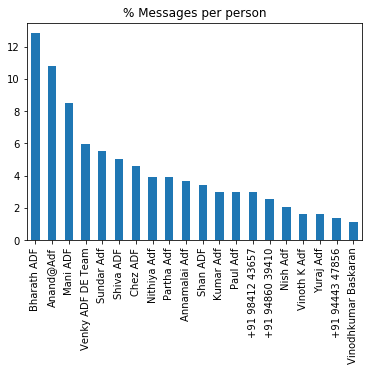

In [26]:
%matplotlib inline
fig = counts.plot("bar", title="% Messages per person")

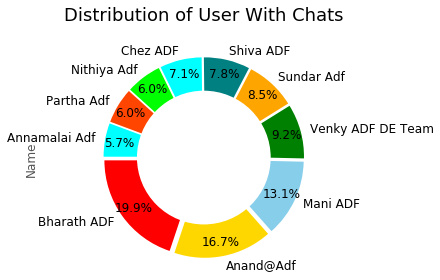

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=new_chat.groupby('Name')['Name'].count().nlargest(10)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)

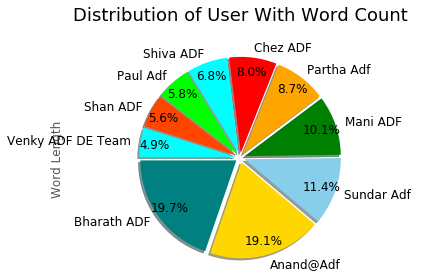

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

word_count=new_chat.groupby(['Name'])['Word Length'].sum().nlargest(10)

def pie_chart(word_count):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'],shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()

pie_chart(word_count)

### Emoji

In [29]:
# !pip install emoji

In [30]:
import emoji

def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [31]:
import collections
import emoji
new_chat["Name"].unique()
emoji_ctr = collections.Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in new_chat.iterrows():
        emojis_found = r.findall(row["Text"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

🤣 - 36
😂 - 22
😁 - 22
😆 - 17
😄 - 13
🎂 - 13
🏻 - 13
🥳 - 11
😬 - 11
😃 - 10


In [32]:
new_chat['emoji']=new_chat['Text'].apply(extract_emojis)

In [33]:
print(pd.DataFrame(new_chat.groupby(['emoji']))[0].unique())

['' '❤' '🍻' '🍻🍻' '🍾🍾🥂' '🎂' '🎂🍻' '🎂🎂🎂' '🎂🎂🎂🍬' '🎂🥳🍻' '🎉🎊🎂' '👀' '👌🏻👌🏻' '👌🏻😄'
 '👌👌' '👍🏻👍🏻' '👏' '👏🏼👏🏼' '💣💣💣' '💪' '😀' '😁' '😁💥✨⭐👍🏼☺😁' '😁😁😁' '😁😁😁😁😁'
 '😁😁😁😁😁🤣🤣🤣🤣' '😂😂' '😂😂😂' '😃' '😃😃' '😃😃🎂🍾' '😃😃😃' '😄' '😄😄😄' '😅' '😅😄' '😆' '😆😆'
 '😆😆😆😆' '😇' '😉' '😊' '😊🍻' '😋😋' '😍' '😍❤' '😍🤪' '😛' '😜' '😝' '😨😆' '😩' '😬' '😬😝'
 '😬😬' '😬😬😃😃' '😬😬😬' '😱' '😲😅' '😳' '😴' '😷' '😷😷🙏' '🙂' '🙄' '🙇🏾🙇🏾🙇🏾😎😎😎' '🙏🏻' '🤔'
 '🤣' '🤣😂🤣🤣' '🤣😅' '🤣🤣' '🤣🤣🤣' '🤦🏻♂' '🤦🏻♂🤦🏻♂🤦🏻♂🤦🏻♂🤦🏻♂' '🤨🤨🤨' '🤩' '🤪' '🤪😷'
 '🤪🤪🤪' '🤭' '🤭🤭' '🥳' '🥳🥳🤗' '🥳🥳🥳' '🥳🥳🥳🥳' '🧐' '🧐🧐🧐']


In [34]:
emoji=new_chat.groupby('Name').count()['emoji'].reset_index()

In [35]:
emoji.sort_values('emoji', ascending=False,inplace=True)

In [36]:
emoji['emoji_dis'] = round(emoji['emoji']/sum(emoji['emoji'])*100,2)
emoji[:20]

,Name,emoji,emoji_dis
3,Bharath ADF,56,12.84
0,Anand@Adf,47,10.78
7,Mani ADF,37,8.49
21,Venky ADF DE Team,26,5.96
20,Sundar Adf,24,5.50
18,Shiva ADF,22,5.05
4,Chez ADF,20,4.59
11,Nithiya Adf,17,3.90
12,Partha Adf,17,3.90
1,Annamalai Adf,16,3.67


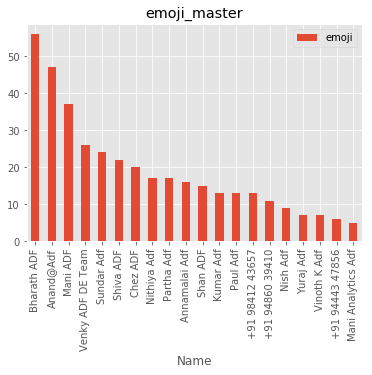

In [37]:
emoji[:20].plot('Name','emoji',kind='bar',title='emoji_master')

In [38]:
new_chat.head()

,Time,Name,Text,date,Word Length,month,day,time_,hours,AM/PM,emoji
2,"10/3/19, 12:45:49 AM",Sundar Adf,‎image omitted,2019-10-03,14,10,3,2020-01-29 00:45:49,0,AM,
3,"10/3/19, 10:57:09 AM",Shan ADF,Needed: Lowering of personal income tax as pro...,2019-10-03,62,10,3,2020-01-29 10:57:09,10,AM,
4,"10/5/19, 7:17:32 AM",‪+91 94860 39410‬,‎image omitted,2019-10-05,14,10,5,2020-01-29 07:17:32,7,AM,
5,"10/5/19, 9:53:03 AM",‪+91 94443 47856‬,‎image omitted,2019-10-05,14,10,5,2020-01-29 09:53:03,9,AM,
6,"10/8/19, 1:07:17 PM",Bharath ADF,‎This message was deleted.,2019-10-08,26,10,8,2020-01-29 13:07:17,13,PM,


### Time

In [39]:
active_time=new_chat[['AM/PM','Name','Text']].groupby(['AM/PM','Name']).count().reset_index()

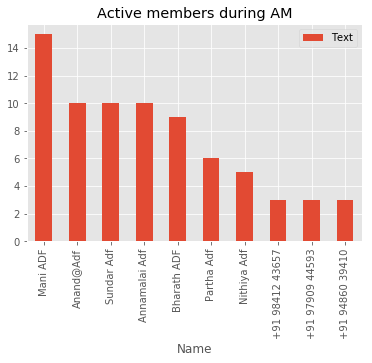

In [40]:
active_time[active_time['AM/PM']=='AM'].sort_values('Text', ascending=False)[:10].plot(x='Name',kind='bar',title='Active members during AM')

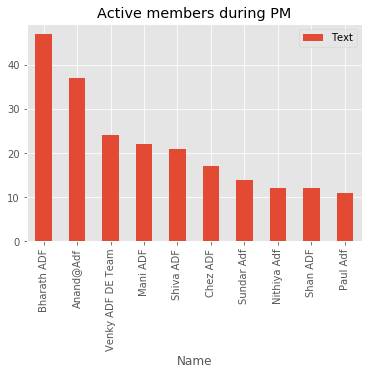

In [41]:
active_time[active_time['AM/PM']=='PM'].sort_values('Text', ascending=False)[:10].plot(x='Name',kind='bar',title='Active members during PM')

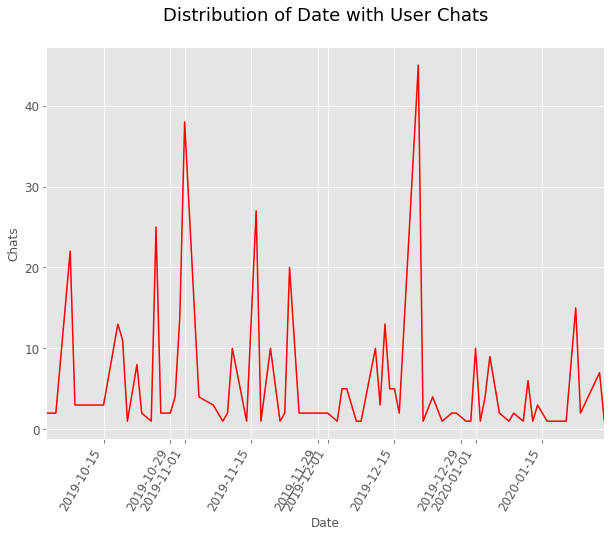

In [50]:
plt.style.use('ggplot')

days=new_chat.groupby('date',sort=False)['date'].count()#.nlargest(15)
def date_users_bar_chart(date):
    plt.figure(figsize=(10,8))
    ax = date.plot(kind='line', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.xticks(rotation=60)
    plt.show()

days_count=days[0:]
date_users_bar_chart(days_count)


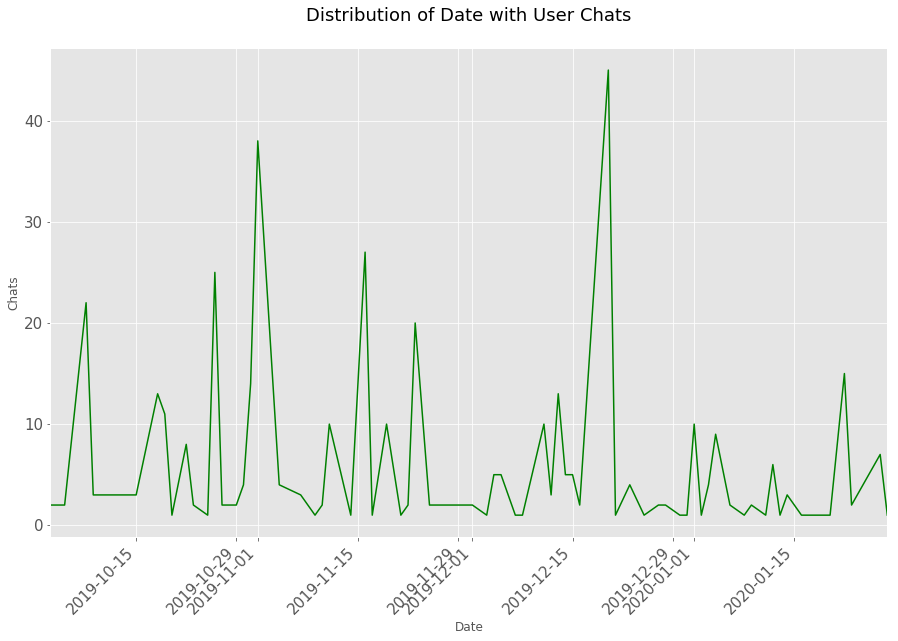

In [51]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

days=new_chat.groupby('date',sort=False)['date'].count()
def user_line_chart(date):
    plt.figure(figsize=(15,10))
    ax = date.plot(kind='line',color='green', fontsize=15)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

user_line_chart(days)

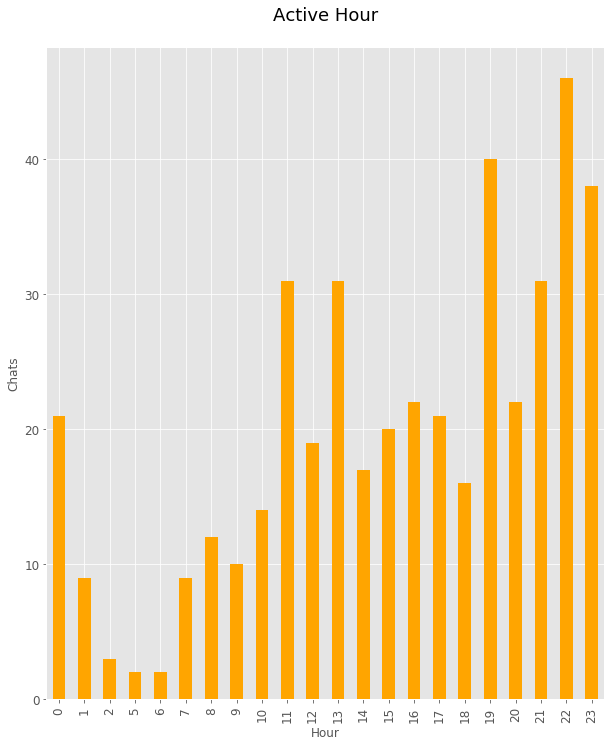

In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_line_group=new_chat[new_cha].groupby(['hours'])['hours'].count()
def active_hour_line_chart(active_hour_line_group):
    plt.figure(figsize=(10,12))
    ax = active_hour_line_group.plot(kind='bar',color='orange', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("Hour", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)

In [516]:
active_hour_line_group

hours
0.0      18
1.0       6
6.0       9
7.0      78
8.0      76
9.0     144
10.0    114
11.0    112
12.0    175
13.0     99
14.0     84
15.0    182
16.0    151
17.0    114
18.0     81
19.0    119
20.0    126
21.0    184
22.0    124
23.0     70
Name: hours, dtype: int64

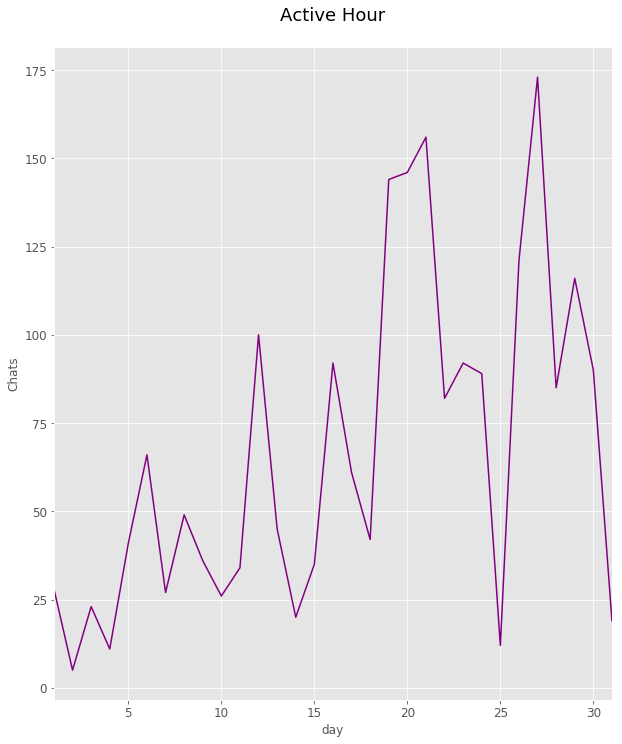

In [504]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_line_group=new_chat.groupby(['day'])['day'].count()
def active_hour_line_chart(active_hour_line_group):
    plt.figure(figsize=(10,12))
    ax = active_hour_line_group.plot(kind='line',color='purple', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("day", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)

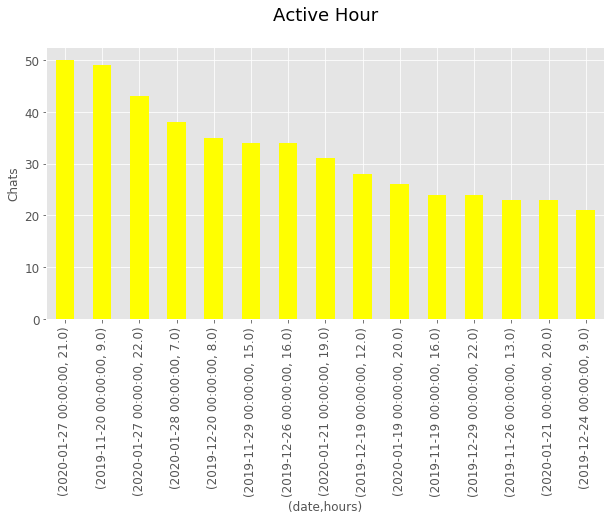

In [513]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_bar_group=new_chat.groupby(['date','hours'])['hours'].count().nlargest(15)
def active_hour_line_chart(active_hour_line_group):
    plt.figure(figsize=(10,5))
    ax = active_hour_line_group.plot(kind='bar',color='yellow', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("(date,hours)", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_bar_group)

In [512]:
pd.DataFrame(active_hour_bar_group)

,,hours
date,hours,
2020-01-27,21.0,50
2019-11-20,9.0,49
2020-01-27,22.0,43
2020-01-28,7.0,38
2019-12-20,8.0,35
2019-11-29,15.0,34
2019-12-26,16.0,34
2020-01-21,19.0,31
2019-12-19,12.0,28
